In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Audio, display
def make_noise():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_folder = '/home/pica/nas_pica/Data/numerai/'


from numebot.round_manager import RoundManager

rm = RoundManager(data_folder) #, nrows=50000)

# Get list of models with their model file
rm.models_info()

Current round: 262
Creating <class 'numebot.models.example_model.ExampleModel'>
Loading pre-trained model...

ERROR: Model rpica_test_1 could not be added to the models list.
Can't instantiate abstract class NumeraiModel with abstract methods load_model

ERROR: Model rpica_test_2 could not be added to the models list.
'float' object has no attribute 'rsplit'

ERROR: Model rpica_test_3 could not be added to the models list.
'float' object has no attribute 'rsplit'


2021-05-03 10:46:13,692 INFO numerapi.base_api: target file already exists



Model name: rpica
 - Code: numebot.models.example_model
 - Model folder: /home/pica/nas_pica/Data/numerai/models/rpica
 - Model file: model_rpica.xgb


In [9]:
# train example model on noisy data

# model = rm.models_dict['rpica']

# print('rm.data.training', rm.data.training.shape)
# with_noise = rm.data.noisy_training(10)
# print('with_noise', with_noise.shape)

# feature_names = [f for f in with_noise.columns if f.startswith("feature")]
print("Training model...")
#model.model.fit(with_noise[feature_names], with_noise['target'])
#model.model.save_model('example_model_trained_on_noisy_data')

output = model.predict(rm.data.tournament)
make_noise()

Training model...
Loading full tournament data ...

Running prediction for model rpica ...
 - Rows: 1709335, columns: 313


In [12]:
import pandas as pd
# Get preds for a model
#model = rm.models_dict['rpica']
output = model.predict(rm.data.tournament)
output.shape
output.head()

submission_path = "example_trained_on_noisy_data.csv"
output = pd.DataFrame(output).rename({0: 'prediction'}, axis=1)
print('columns:', output.columns)
print(f'Saving results into: {submission_path}')
output.to_csv(submission_path, header=True)
# Get performance of the model


Running prediction for model rpica ...
 - Rows: 1709335, columns: 313


(1709335,)

id
n0003aa52cab36c2    0.489021
n000920ed083903f    0.491154
n0038e640522c4a6    0.524261
n004ac94a87dc54b    0.501441
n0052fe97ea0c05f    0.500501
dtype: float32

columns: Index(['prediction'], dtype='object')
Saving results into: example_trained_on_noisy_data.csv


<AxesSubplot:>

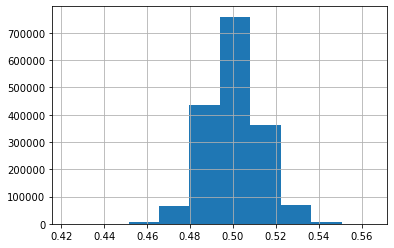

In [4]:
output.hist()

In [5]:
# Get predictions for each model
rm.generate_predictions_for_all_models()


Running prediction for model rpica ...
 - Rows: 1709335, columns: 313
columns: Index(['prediction'], dtype='object')
Saving results into: /home/pica/nas_pica/Data/numerai/models/rpica/rpica_submission_262.csv


In [ ]:
# Submit predictions (test with rpica_test_3)
# Can I check if I submitted? (for example requesting the scoring)


In [10]:
_=[print(attr) for attr in dir(napi) if not attr.startswith('_')]

PUBLIC_DATASETS_URL
check_new_round
daily_submissions_performances
daily_user_performances
download_current_dataset
download_latest_data
get_account
get_account_transactions
get_competitions
get_current_round
get_dataset_url
get_latest_data_url
get_leaderboard
get_models
get_payments
get_submission_filenames
get_transactions
get_user
get_user_activities
logger
public_user_profile
raw_query
round_details
set_submission_webhook
show_progress_bars
stake_change
stake_decrease
stake_drain
stake_get
stake_increase
stake_set
submission_id
submission_status
token
tournament_id
upload_predictions


In [10]:
# get competitions
all_competitions = rm.napi.get_competitions()
all_competitions[6:8]

2021-05-02 17:28:09,789 INFO numerapi.base_api: getting rounds...


[{'datasetId': 'NULL',
  'number': 256,
  'openTime': datetime.datetime(2021, 3, 20, 18, 0, tzinfo=tzutc()),
  'participants': 3983,
  'prizePoolNmr': None,
  'prizePoolUsd': None,
  'resolveTime': datetime.datetime(2021, 4, 21, 20, 0, tzinfo=tzutc()),
  'resolvedGeneral': True,
  'resolvedStaking': True,
  'ruleset': None},
 {'datasetId': 'NULL',
  'number': 255,
  'openTime': datetime.datetime(2021, 3, 13, 18, 0, tzinfo=tzutc()),
  'participants': 3894,
  'prizePoolNmr': None,
  'prizePoolUsd': None,
  'resolveTime': datetime.datetime(2021, 4, 14, 20, 0, tzinfo=tzutc()),
  'resolvedGeneral': True,
  'resolvedStaking': True,
  'ruleset': None}]

In [24]:
# get leaderboard for the current round
leaderboard = rm.napi.get_leaderboard(limit=10000)
len(leaderboard)
leaderboard_dict = {competitor['username']:competitor for competitor in leaderboard}

6767

In [26]:
leaderboard_dict['rpica']
leaderboard_dict['rpica_test_1']

{'averageCorrelationPayout': None,
 'badges': [],
 'bonusPerc': 0.0,
 'leaderboardBonus': '0.000000000000000000',
 'nmrStaked': Decimal('0E-18'),
 'oldStakeValue': None,
 'payoutPending': '0.000000000000000000',
 'payoutSettled': '0.000000000000000000',
 'prevRank': 5130,
 'prevStakedRank': None,
 'rank': 4984,
 'reputation': 0.0,
 'rolling_score_rep': -0.0920214925612844,
 'stakedRank': None,
 'tier': '?',
 'username': 'rpica'}

{'averageCorrelationPayout': None,
 'badges': [],
 'bonusPerc': 0.0,
 'leaderboardBonus': '0.000000000000000000',
 'nmrStaked': Decimal('0.500000000000000000'),
 'oldStakeValue': None,
 'payoutPending': '0.001335705381102667',
 'payoutSettled': '0.001335705381102667',
 'prevRank': 5310,
 'prevStakedRank': 3345,
 'rank': 5294,
 'reputation': 0.0,
 'rolling_score_rep': -0.0940263017091988,
 'stakedRank': 3335,
 'tier': '?',
 'username': 'rpica_test_1'}

In [12]:
# check if a new round has started
if rm.napi.check_new_round():
    print("new round has started wihtin the last 24hours!")
else:
    print("no new round within the last 24 hours")

no new round within the last 24 hours


In [14]:
# provide api tokens
from numebot.secret import PUBLIC_ID, SECRET_KEY


import numerapi
napi = numerapi.NumerAPI(PUBLIC_ID, SECRET_KEY)

models_dict = napi.get_models()

# upload predictions
#submission_id = napi.upload_predictions("preds.csv", tournament=1)
# check submission status
napi.submission_status(model_id=models_dict['rpica'])

Loading credential data:
 - Current folder: /home/pica/workspace/numebot/notebook
 - .secret path:   /home/pica/workspace/numebot/.secret
 - Credentials loaded: odict_keys(['PUBLIC_KEY', 'PRIVATE_KEY'])


In [6]:
import pandas as pd
from xgboost import XGBRegressor
from pathlib import Path

DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/21-03-14 weekly/')
DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/numerai_dataset_258/')
OUTPUT_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/output/')

# training data contains features and targets
training_data = pd.read_csv(DATA_FOLDER/"numerai_training_data.csv").set_index("id")

# tournament data contains features only
tournament_data = pd.read_csv(DATA_FOLDER/"numerai_tournament_data.csv").set_index("id")
feature_names = [f for f in training_data.columns if "feature" in f]

live_data = tournament_data[tournament_data['data_type'] == 'live']
tournament_data = tournament_data[tournament_data['data_type'] != 'live']

training_data['era'] = training_data['era'].str.lstrip('era').astype(int)
tournament_data['era'] = tournament_data['era'].str.lstrip('era').astype(int)
live_data['era'] = live_data['era'].str.lstrip('era')

training_data.shape
tournament_data.shape
live_data.shape

(1687616, 313)

## EDA

In [16]:
training_data.info()
live_data.info()
tournament_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501808 entries, n000315175b67977 to nffba5460b572cfa
Columns: 313 entries, era to target
dtypes: float64(311), object(2)
memory usage: 1.2+ GB
<class 'pandas.core.frame.DataFrame'>
Index: 1687616 entries, n0003aa52cab36c2 to nfffae0a5193a0c9
Columns: 313 entries, era to target
dtypes: float64(311), object(2)
memory usage: 4.0+ GB


In [23]:
import numpy as np

In [40]:
for dataset, set_name in zip([training_data, tournament_data, live_data], ['training', 'tournament', 'live']):
    print(f'Info about {set_name}: shape {dataset.shape}')
    #dataset[[col for col in dataset.columns if 'feature' not in col]].head(2)
    dataset.groupby('data_type')['era'].agg(['count','min','max', pd.Series.nunique, lambda x: sorted(list(np.unique(x)))])
    

train_era = training_data

Info about training: shape (501808, 313)


,count,min,max,nunique,<lambda_0>
data_type,,,,,
train,501808,1,120,120,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Info about tournament: shape (1682185, 313)


,count,min,max,nunique,<lambda_0>
data_type,,,,,
test,1544406,575,952,304,"[575, 576, 577, 578, 579, 580, 581, 582, 583, ..."
validation,137779,121,212,28,"[121, 122, 123, 124, 125, 126, 127, 128, 129, ..."


Info about live: shape (5431, 313)


,count,min,max,nunique,<lambda_0>
data_type,,,,,
live,5431,X,X,1,[X]


## Experiment with feature neutralization 

In [42]:
def neutralize(df, target="prediction_kazutsugi", by=None, proportion=1.0):
    if by is None:
        by = [x for x in df.columns if x.startswith('feature')]

    scores = df[target]
    exposures = df[by].values

    # constant column to make sure the series is completely neutral to exposures
    exposures = np.hstack((exposures, np.array([np.mean(scores)] * len(exposures)).reshape(-1, 1)))

    scores -= proportion * (exposures @ (np.linalg.pinv(exposures) @ scores.values))
    return scores / scores.std()

In [43]:
DATA_FOLDER = Path('/home/pica/hdd/nas/Data/numerai/numerai_dataset_258/')
OUTPUT_PATH = DATA_FOLDER/'submission.csv'

In [47]:
outputs = pd.read_csv(OUTPUT_PATH).set_index("id")
outputs.shape
outputs.head(2)
len(outputs) - outputs.nunique()

(1687616, 1)

,prediction
id,
n0003aa52cab36c2,0.490147
n000920ed083903f,0.484588


prediction    814491
dtype: int64

In [48]:
tournament_data = pd.read_csv(DATA_FOLDER/"numerai_tournament_data.csv").set_index("id")
tournament_data.shape

(1687616, 313)

In [49]:
tournament_data['target'] = outputs
tournament_data.shape

(1687616, 313)

In [69]:
neutralized = neutralize(tournament_data, target='target')

In [74]:
neutralized = pd.DataFrame(neutralized)
neutralized.head(2)

,target
id,
n0003aa52cab36c2,0.830798
n000920ed083903f,-0.592200


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

neutralized.rename({'target': 'prediction'}, axis=1, inplace=True)
neutralized.head()
neutralized_scaled = neutralized.copy()
neutralized_scaled[['prediction']] = scaler.fit_transform(neutralized[['prediction']])

,prediction
id,
n0003aa52cab36c2,0.830798
n000920ed083903f,-0.592200
n0038e640522c4a6,0.459127
n004ac94a87dc54b,0.940418
n0052fe97ea0c05f,-0.195255


In [97]:
neutralized_scaled.describe().loc[['min', 'max'], :]

,prediction
min,0.0
max,1.0


In [98]:
neutralized_scaled.to_csv(DATA_FOLDER/"submission_neutralized.csv", header=True)

## train

In [2]:
# train a model to make predictions on tournament data
model = XGBRegressor(max_depth=5, learning_rate=0.01, \
                     n_estimators=2000, colsample_bytree=0.1, n_jobs=-1)
model.fit(training_data[feature_names], training_data["target"])

# submit predictions to numer.ai
predictions = model.predict(tournament_data[feature_names])

In [15]:
predictions = pd.DataFrame({'predictions': predictions}, index=tournament_data.index)

In [3]:
pd.Series(predictions).shape
OUTPUT_FOLDER.mkdir(exist_ok=True, parents=True)
pd.Series(predictions).to_csv(OUTPUT_FOLDER/"predictions.csv")

In [4]:
for data in [training_data, tournament_data]:
    print(data.shape)
    print(data[['era']].nunique())
    print(data[['era']].max())
    print(data.index.nunique())
    data.head()
    print('')
    

(501808, 313)
era    120
dtype: int64
era    era99
dtype: object
501808

(1671309, 313)
era    330
dtype: int64
era    eraX
dtype: object
1671309



In [14]:
predictions

array([0.49014705, 0.48458785, 0.5313182 , ..., 0.50375384, 0.47683442,
       0.4946108 ], dtype=float32)

In [19]:
training_data.head()
tournament_data.head()

,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
id,,,,,,,,,,,,,,,,,,,,,
n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,...,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00,0.25
n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,...,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50,0.50
n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,...,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00,1.00
n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,...,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25,0.50
n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,...,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00,0.75


In [18]:
tournament_data.shape
tournament_data.head()

for era in tournament_data['era'].unique():
    ids_in_era = tournament_data[tournament_data['era'] == era].index
    era_preds = predictions[predictions.index.isin(ids_in_era)]
    
    if era_preds['predictions'].nunique() != len(era_preds):
        print(f'Repeated values in {era}: len {len(era_preds)}, unique values: {era_preds["predictions"].nunique()}')

(1671309, 313)

,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,...,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
id,,,,,,,,,,,,,,,,,,,,,
n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.0,0.75,0.5,0.25,...,0.75,0.75,1.00,0.75,0.50,0.5,1.0,0.00,0.00,0.25
n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.5,0.00,0.0,0.75,...,0.50,0.50,0.75,1.00,0.75,0.5,0.5,0.50,0.50,0.50
n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.0,1.00,1.0,1.00,...,0.00,0.00,0.50,0.25,0.00,0.0,0.5,0.50,0.00,1.00
n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.0,0.00,0.0,0.50,...,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.25,0.25,0.50
n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.0,0.50,0.5,0.25,...,0.50,0.75,0.00,0.00,0.75,1.0,0.0,0.25,1.00,0.75


Repeated values in era121: len 4573, unique values: 4556
Repeated values in era122: len 4658, unique values: 4645
Repeated values in era123: len 4609, unique values: 4598
Repeated values in era124: len 4630, unique values: 4618
Repeated values in era125: len 4698, unique values: 4684
Repeated values in era126: len 4682, unique values: 4660
Repeated values in era127: len 4688, unique values: 4675
Repeated values in era128: len 4636, unique values: 4625
Repeated values in era129: len 4705, unique values: 4697
Repeated values in era130: len 4756, unique values: 4749
Repeated values in era131: len 4814, unique values: 4802
Repeated values in era132: len 4812, unique values: 4799
Repeated values in era575: len 4813, unique values: 4798
Repeated values in era576: len 4827, unique values: 4821
Repeated values in era577: len 4856, unique values: 4843
Repeated values in era578: len 4863, unique values: 4846
Repeated values in era579: len 4859, unique values: 4852
Repeated values in era580: len 

KeyboardInterrupt: 